In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

## 0. Data processing and visualization
Load abalone.csv dataset, perform exploratory analysis on the dataset. Clean the data NA-s and from uninformative columns if any.

In [2]:
df = pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df = df.fillna(method='bfill')

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


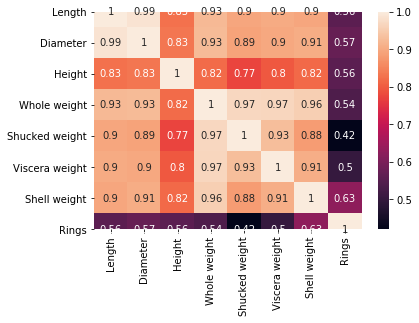

In [6]:
plt.figure(figsize=(6, 4))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

## 1. Fitting SVM
In this task we will try to predict the gender of an abalone snail. In the dataset we have three classes: "M" - male, "F"-female, "I" - infant.
1. Change the target variable from categorical to numeric.
2. Perform train/test split with ratio 85/15.
3. Reduce the training set to 2 dimensions and make a scatter plot, by coloring the points according to target variable. What do you think can SVM with linear kernel get good results?
4. Choose the best parameters for SVM and fit a model with that best params, report the accuracy and f1-score on the test set.

In [7]:
df["Sex"] = df["Sex"].astype('category')
df["Sex"] = df["Sex"].cat.codes
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
X = df[df.columns.difference(["Sex"])]
X = preprocessing.StandardScaler().fit(X).transform(X)
y = df['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [9]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_transformed_train = pca.fit_transform(X_train)
X_transformed_test = pca.fit_transform(X_test)

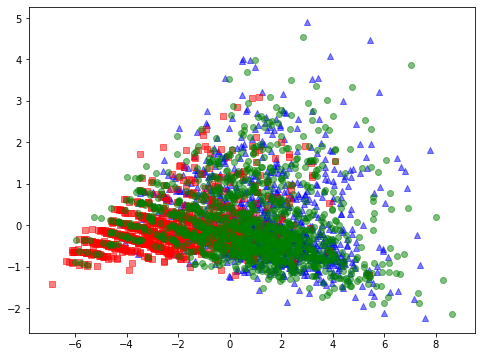

In [10]:
plt.figure(figsize=(8, 6))
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    plt.scatter(X_transformed_train[y_train == l, 0],
                X_transformed_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )


In [11]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear','poly','rbf','sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.556, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.530, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.533, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.564, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.529, total=   0.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.545, total=   2.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.540, total=   2.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.529, total=   2.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.542, total=   1.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.530, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.533, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.564, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.529, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.364, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.364, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.364, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .

[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.391, total=   0.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.556, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.527, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.533, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.571, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.532, total=   0.2s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.513, total=   0.3s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] .

[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.516, total=   0.4s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.549, total=   0.4s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.526, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.556, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.527, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.533, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.571, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.487, total=   0.3s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.436, total=   0.3s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.481, total=   0.3s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.478, total=   0.3s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.456, total=   0.3s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.559, total=   0.6s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.529, total=   0.5s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.546, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.529, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.544, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.509, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.516, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.549, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.526, total=   0.4s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 17.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
best_score, best_score_id = grid.cv_results_['mean_test_score'].max(),grid.cv_results_['mean_test_score'].argmax()
best_hyperparams = grid.cv_results_['params'][best_score_id]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.5580281690140845 corresponding to hyperparameters {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [21]:
model = SVC(C=10, kernel='linear')

In [22]:
model.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = model.predict(X_test)

In [42]:
 print ("Accuracy on test set:", model.score(X_test, y_test))
 print ("F1 score on test set:", f1_score(y_test, y_pred, average='micro'))

Accuracy on test set: 0.5677830940988836
F1 score on test set: 0.5677830940988836


## 2. Fitting Logistic Regression
Here again we will try to predict the same target variable as in the previous task. Use the same train and test sets as in the previous task.
1. Choose the best parameters for logistic regression model and report the accuracy and f1-score on the test set.
2. You know that logistic regression performs better on smaller number of dimensions. Try to reduce the number of dimensions in the dataset and again fit choose the best parameters for the logistic regression model and report the accuracy and f1-score on the test set.
3. Write a short paragraph comparing the results you got in task 1 and task 2, what do you think why you got that results?

In [35]:
param_grid_logistic = {'C': [0.01,0.1,1, 10], 'l1_ratio':[0,0.25,0.5,0.75,1] }
grid_logistic = GridSearchCV(LogisticRegression(n_jobs=4,tol=1e-3,solver='saga',penalty='elasticnet'),param_grid_logistic,refit=True,verbose=3,cv=4)

In [36]:
grid_logistic.fit(X_train,y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] C=0.01, l1_ratio=0 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=0.01, l1_ratio=0, score=0.543, total=   9.4s
[CV] C=0.01, l1_ratio=0 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=0.01, l1_ratio=0, score=0.525, total=   0.6s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.551, total=   0.0s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.537, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.545, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.516, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.545, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.540, total=   0.0s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the mu

[CV] ................ C=0.01, l1_ratio=0.5, score=0.551, total=   0.0s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] ................ C=0.01, l1_ratio=0.5, score=0.543, total=   0.0s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.545, total=   0.0s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.521, total=   0.0s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.551, total=   0.0s
[CV] C=0.01, l1_ratio=0.75 ...........................................
[CV] ............... C=0.01, l1_ratio=0.75, score=0.542, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.532, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/hom

[CV] .................. C=0.01, l1_ratio=1, score=0.521, total=   0.1s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.552, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.543, total=   0.0s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.543, total=   0.0s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.533, total=   0.1s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.560, total=   0.0s
[CV] C=0.1, l1_ratio=0 ...............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/hom

[CV] ................... C=0.1, l1_ratio=0, score=0.540, total=   0.0s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.543, total=   0.0s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.533, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.559, total=   0.1s
[CV] C=0.1, l1_ratio=0.25 ............................................
[CV] ................ C=0.1, l1_ratio=0.25, score=0.536, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................
[CV] ................. C=0.1, l1_ratio=0.5, score=0.541, total=   0.0s
[CV] C=0.1, l1_ratio=0.5 .............................................
[CV] ................. C=0.1, l1_ratio=0.5, score=0.537, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................. C=0.1, l1_ratio=0.5, score=0.556, total=   0.1s
[CV] C=0.1, l1_ratio=0.5 .............................................
[CV] ................. C=0.1, l1_ratio=0.5, score=0.536, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.550, total=   0.0s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.538, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................ C=0.1, l1_ratio=0.75, score=0.559, total=   0.1s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.535, total=   0.0s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.547, total=   0.0s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.539, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.564, total=   0.1s
[CV] C=0.1, l1_ratio=1 ...............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/hom

[CV] ................... C=0.1, l1_ratio=1, score=0.535, total=   0.1s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.534, total=   0.0s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.536, total=   0.1s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.563, total=   0.1s
[CV] C=1, l1_ratio=0 .................................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..................... C=1, l1_ratio=0, score=0.535, total=   0.1s
[CV] C=1, l1_ratio=0.25 ..............................................
[CV] .................. C=1, l1_ratio=0.25, score=0.533, total=   0.0s
[CV] C=1, l1_ratio=0.25 ..............................................
[CV] .................. C=1, l1_ratio=0.25, score=0.536, total=   0.1s
[CV] C=1, l1_ratio=0.25 ..............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=1, l1_ratio=0.25, score=0.560, total=   0.1s
[CV] C=1, l1_ratio=0.25 ..............................................
[CV] .................. C=1, l1_ratio=0.25, score=0.534, total=   0.1s
[CV] C=1, l1_ratio=0.5 ...............................................
[CV] ................... C=1, l1_ratio=0.5, score=0.533, total=   0.1s
[CV] C=1, l1_ratio=0.5 ...............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................... C=1, l1_ratio=0.5, score=0.537, total=   0.1s
[CV] C=1, l1_ratio=0.5 ...............................................
[CV] ................... C=1, l1_ratio=0.5, score=0.560, total=   0.1s
[CV] C=1, l1_ratio=0.5 ...............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................... C=1, l1_ratio=0.5, score=0.535, total=   0.1s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.535, total=   0.0s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.536, total=   0.1s
[CV] C=1, l1_ratio=0.75 ..............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=1, l1_ratio=0.75, score=0.560, total=   0.1s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.534, total=   0.1s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.536, total=   0.0s
[CV] C=1, l1_ratio=1 .................................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ..................... C=1, l1_ratio=1, score=0.535, total=   0.1s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.560, total=   0.1s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.534, total=   0.1s
[CV] C=10, l1_ratio=0 ................................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................... C=10, l1_ratio=0, score=0.537, total=   0.1s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.533, total=   0.1s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.561, total=   0.1s
[CV] C=10, l1_ratio=0 ................................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................... C=10, l1_ratio=0, score=0.536, total=   0.1s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.537, total=   0.1s
[CV] C=10, l1_ratio=0.25 .............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................. C=10, l1_ratio=0.25, score=0.533, total=   0.1s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.561, total=   0.1s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.536, total=   0.1s
[CV] C=10, l1_ratio=0.5 ..............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=10, l1_ratio=0.5, score=0.537, total=   0.1s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.533, total=   0.1s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.560, total=   0.1s
[CV] C=10, l1_ratio=0.5 ..............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=10, l1_ratio=0.5, score=0.536, total=   0.1s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.537, total=   0.1s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.533, total=   0.1s
[CV] C=10, l1_ratio=0.75 .............................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ................. C=10, l1_ratio=0.75, score=0.561, total=   0.1s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.536, total=   0.1s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.537, total=   0.1s
[CV] C=10, l1_ratio=1 ................................................


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................... C=10, l1_ratio=1, score=0.533, total=   0.1s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.561, total=   0.1s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.536, total=   0.1s


/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   15.0s finished
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=4, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [37]:
best_score_logistic, best_score_id_logistic = grid_logistic.cv_results_['mean_test_score'].max(),grid_logistic.cv_results_['mean_test_score'].argmax()
best_hyperparams_logistic = grid_logistic.cv_results_['params'][best_score_id_logistic]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score_logistic, best_hyperparams_logistic))

The best test score is 0.5464788732394367 corresponding to hyperparameters {'C': 0.1, 'l1_ratio': 1}


In [38]:
model_log = LogisticRegression(tol=1e-3, solver='saga', penalty='elasticnet', C=0.1, l1_ratio=1)

In [40]:
model_log.fit(X_train, y_train)

/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.001, verbose=0,
                   warm_start=False)

In [41]:
y_pred_log = model_log.predict(X_test)

In [43]:
 print ("Accuracy on test set:", model_log.score(X_test, y_test))
 print ("F1 score on test set:", f1_score(y_test, y_pred_log, average='micro'))

Accuracy on test set: 0.5821371610845295
F1 score on test set: 0.5821371610845295


In [46]:
grid_logistic.fit(X_transformed_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.546, total=   0.0s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.510, total=   0.0s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.536, total=   0.0s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.536, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.542, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.515, total=   0.0s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane

[CV] .................. C=0.01, l1_ratio=1, score=0.543, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.514, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.543, total=   0.0s
[CV] C=0.01, l1_ratio=1 ..............................................
[CV] .................. C=0.01, l1_ratio=1, score=0.525, total=   0.0s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.537, total=   0.0s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.514, total=   0.0s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] ................... C=0.1, l1_ratio=0, score=0.538, total=   0.0s
[CV] C=0.1, l1_ratio=0 ...............................................
[CV] .

/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/hom

[CV] ................ C=0.1, l1_ratio=0.75, score=0.535, total=   0.0s
[CV] C=0.1, l1_ratio=0.75 ............................................
[CV] ................ C=0.1, l1_ratio=0.75, score=0.534, total=   0.0s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.538, total=   0.0s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.516, total=   0.0s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.536, total=   0.0s
[CV] C=0.1, l1_ratio=1 ...............................................
[CV] ................... C=0.1, l1_ratio=1, score=0.535, total=   0.0s
[CV] C=1, l1_ratio=0 .................................................
[CV] ..................... C=1, l1_ratio=0, score=0.536, total=   0.0s
[CV] C=1, l1_ratio=0 .................................................
[CV] .

/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/hom

[CV] .................. C=1, l1_ratio=0.75, score=0.533, total=   0.0s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.514, total=   0.0s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.541, total=   0.0s
[CV] C=1, l1_ratio=0.75 ..............................................
[CV] .................. C=1, l1_ratio=0.75, score=0.532, total=   0.0s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.535, total=   0.0s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.512, total=   0.0s
[CV] C=1, l1_ratio=1 .................................................
[CV] ..................... C=1, l1_ratio=1, score=0.541, total=   0.0s
[CV] C=1, l1_ratio=1 .................................................
[CV] .

/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/hom

[CV] .................. C=10, l1_ratio=0.5, score=0.539, total=   0.0s
[CV] C=10, l1_ratio=0.5 ..............................................
[CV] .................. C=10, l1_ratio=0.5, score=0.533, total=   0.0s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.534, total=   0.0s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.514, total=   0.0s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.539, total=   0.0s
[CV] C=10, l1_ratio=0.75 .............................................
[CV] ................. C=10, l1_ratio=0.75, score=0.533, total=   0.0s
[CV] C=10, l1_ratio=1 ................................................
[CV] .................... C=10, l1_ratio=1, score=0.536, total=   0.0s
[CV] C=10, l1_ratio=1 ................................................
[CV] .

/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/hom

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=4, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [47]:
best_score_logistic, best_score_id_logistic = grid_logistic.cv_results_['mean_test_score'].max(),grid_logistic.cv_results_['mean_test_score'].argmax()
best_hyperparams_logistic = grid_logistic.cv_results_['params'][best_score_id_logistic]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score_logistic, best_hyperparams_logistic))

The best test score is 0.5332394366197183 corresponding to hyperparameters {'C': 0.01, 'l1_ratio': 0.5}


In [49]:
model_log_reduced = LogisticRegression(tol=1e-3, solver='saga', penalty='elasticnet', C=0.01, l1_ratio=0.5)

In [50]:
model_log_reduced.fit(X_transformed_train, y_train)

/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.001, verbose=0,
                   warm_start=False)

In [51]:
y_pred_reduced = model_log_reduced.predict(X_transformed_test)

In [52]:
 print ("Accuracy on test set:", model_log_reduced.score(X_transformed_test, y_test))
 print ("F1 score on test set:", f1_score(y_test, y_pred_reduced, average='micro'))

Accuracy on test set: 0.5406698564593302
F1 score on test set: 0.5406698564593302


I got almost the same results for three models. I think my problem is that I cannot run grid search for higher C values. I did a grid search for higher C values, but after 2 hours it kept working and I had to stop process.